Vamos a trabajar con la tabla de datos
airquality
ya utilizada en la Tarea 1 para realizar varios contrastes de hipótesis. Cargar en primer lugar dichos datos y
pasar las temperaturas a Kelvin.

In [4]:
#Pasamos de grados Farenheit a Kelvin:
airqualityKelvin <- data.frame(airquality[-(4)])   #Quita la cuarta columna (Temp)
TempKelvin <- (airquality[4]-32)*(5/9)+273.15           #Se pasa a Kelvin
airqualityKelvin <- data.frame(airqualityKelvin[1:3],Temp=TempKelvin,airqualityKelvin[4:5]) #data frame con Temp en Kelvin                         

### 1) 
¿Cómo podríamos obtener, con una única instrucción en R, una tabla que nos diese latemperatura media en cada uno de los 5 meses incluídos en los datos? Escribir dicha instrucción(sin usar ";").

In [5]:
mediames <- tapply(airqualityKelvin$Temp,airqualityKelvin$Month,mean,na.rm=TRUE,simplify=TRUE) #na.rm ignoraría los NA
#aplica media sobre el conjunto de datos que lleven asociado el mismo valor en la categoría Month
cat('Las medias mensuales son:\n')
mediames

Las medias mensuales son:


5        6        7        8        9 
291.7880 299.3167 301.9851 302.0210 298.0944

### 2)
Hacer y subir al campus virtual (en formato pdf) un diagrama de tipo box-and-whisker endonde se comparen las distribuciones de temperatura en función del mes.

[1] 292.5944 295.3722 296.4833 289.8167 286.4833 292.0389 291.4833 288.1500
 [9] 289.2611 293.7056 296.4833 293.7056 292.0389 293.1500 287.5944 290.9278
[17] 292.0389 287.0389 293.1500 289.8167 288.1500 295.9278 289.2611 289.2611
[25] 287.0389 287.5944 287.0389 292.5944 300.3722 299.2611 297.5944

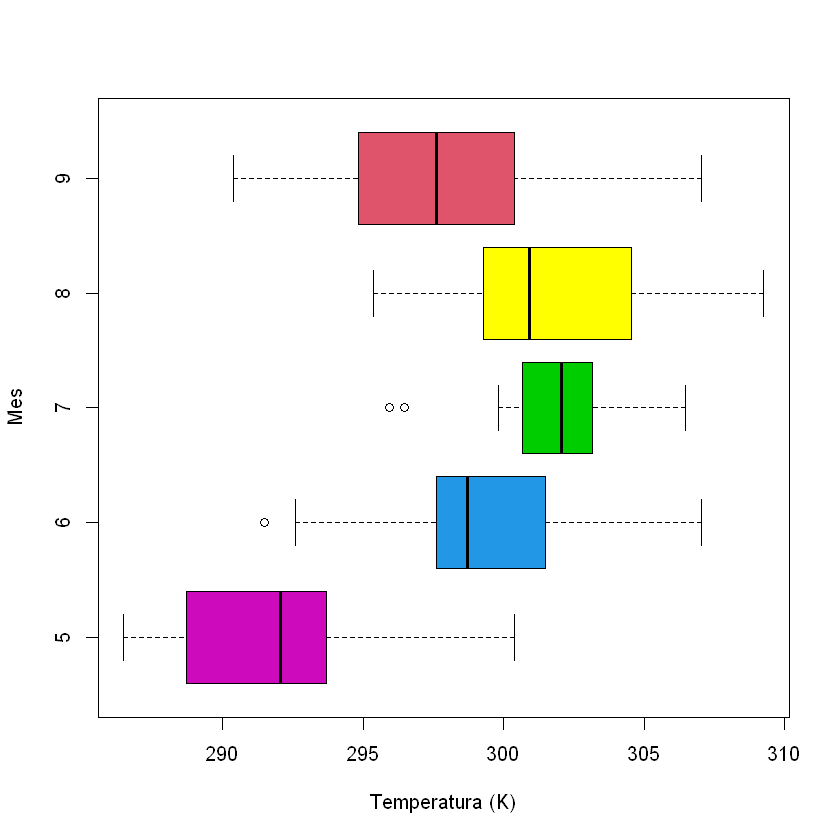

In [6]:
vec5 <- airqualityKelvin$Temp[airquality$Month==5] #Vectores con las temperaturas para cada mes
vec6 <- airqualityKelvin$Temp[airquality$Month==6]
vec7 <- airqualityKelvin$Temp[airquality$Month==7]
vec8 <- airqualityKelvin$Temp[airquality$Month==8]
vec9 <- airqualityKelvin$Temp[airquality$Month==9]
#Hacemos el gráfico tipo box-and-whisker
boxplot(vec5,vec6,vec7,vec8,vec9,col=c('#CD0BBC','#2297E6','green3','yellow','#DF536B'),names=c('5','6','7','8','9'),horizontal=TRUE,ylab='Mes',xlab='Temperatura (K)')

### 3)
Seleccionar las temperaturas para los días de los tres meses más cálidos
(junio, julio yagosto)
y guardar los datos en una nueva variable llamada
T.verano
. Suponiendo que las medidas de
T.verano
siguen una distribución normal:

In [4]:
sortmediames<- sort(mediames,decreasing=TRUE) # Ordena los meses según su temperatura media de manera decreciente
sortmediames

nummes <- as.numeric(names(sortmediames))     # Crea un vector con los números de mes de los meses ordenados

T.verano <- as.numeric()
for (i in nummes[1:3]){                       # Sólo se toman los 3 meses más cálidos
    T.verano <- c(T.verano,airqualityKelvin$Temp[airqualityKelvin$Month==i])
}                                             #Vector con las temperaturas de esos 3 meses

8        7        6        9        5 
302.0210 301.9851 299.3167 298.0944 291.7880

### 3A) 
¿Es el valor medio de T.verano significativamente diferente de 300.5 K? Usar un nivel designificación de 0.05.

In [5]:
cat('Hacemos un contraste bilateral con H_0: mu=300.5=mu0 Y h_1: mu distinto de mu0=300.5.\n')
mu <- 300.5
xbar <- mean(T.verano)
cat('La media de los datos es:',xbar,'. En principio, no parece significativamente diferente.','\n')
cat('Como no conocemos la varianza poblacional, necesitamos calcular la desviación típica, pero usaremos el estadístico z, 
al tener una muestra mucho mayor de 30.','\n')
z <- (xbar-mu)/(sd(T.verano/sqrt(length(T.verano))))   #Se calcula el estadístico z
alpha <- 0.05
z.alpha <- qnorm(1-alpha/2)                              #Valor crítico de z
cat('El valor crítico de z es',z.alpha,', mientras que nuestro estadístio vale',z,'por lo que se acepta la hipótesis nula 
y suponemos que el valor medio de T.verano no es significativamente diferente de ',mu,'.\n')

Hacemos un contraste bilateral con H_0: mu=300.5=mu0 Y h_1: mu distinto de mu0=300.5.
La media de los datos es: 301.1271 . En principio, no parece significativamente diferente. 
Como no conocemos la varianza poblacional, necesitamos calcular la desviación típica, pero usaremos el estadístico z, 
al tener una muestra mucho mayor de 30. 
El valor crítico de z es 1.959964 , mientras que nuestro estadístio vale 1.722393 por lo que se acepta la hipótesis nula 
y suponemos que el valor medio de T.verano no es significativamente diferente de  300.5 .


### 3B)
¿Para qué nivel de significación mínimo (valor de
p) es la media de
T.verano
significativamente diferente del valor de 300.5 K?

In [6]:
p <- 2*pnorm(z, lower.tail=FALSE)
cat('El nivel de significación con el que se rechazaría la hipótesis nula es',p,'.\n')

El nivel de significación con el que se rechazaría la hipótesis nula es 0.08499841 .


# 3C)
¿Es el valor medio de
T.verano
significativamente mayor que 300.5 K? Usar un nivel de significación de 0.05.

In [7]:
cat('La hipótesis nula sería en este caso H_0 menor o igual que 300.5K y el contraste sería unilateral.','\n')
mu <- 300.5
xbar <- mean(T.verano)
cat('De nuevo, usamos el estadístico z, al ser la muestra mayor a 30.','\n')
z <- (xbar-mu)/(sd(T.verano)/sqrt(length(T.verano))) #Se calcula el estadístico z
alpha <- 0.05
z.alpha <- qnorm(1-alpha)   #Valor crítico de z
cat('Los valores de z y de z crítico serían',z,'y',z.alpha,', respectivamente. Como el valor de z está en la región
crítica, se niega la hipótesis nula, con lo que se considera que el valor medio poblacional en verano es significativamente
mayor que 300.5 K.','\n')

La hipótesis nula sería en este caso H_0 menor o igual que 300.5K y el contraste sería unilateral. 
De nuevo, usamos el estadístico z, al ser la muestra mayor a 30. 
Los valores de z y de z crítico serían 1.722393 y 1.644854 , respectivamente. Como el valor de z está en la región
crítica, se niega la hipótesis nula, con lo que se considera que el valor medio poblacional en verano es significativamente
mayor que 300.5 K. 


### 3D)
¿Para qué nivel de significación mínimo (valor de
p) es significativamente mayor que 300.5K?

In [8]:
p <- pnorm(z,lower.tail=FALSE) #Nivel de significación
cat('El nivel de significación mínimo debe ser inferior a',p,', ya que con este valor se aceptaría la hipótesis nula.
Nótese que a menor nivel de significación, más amplia será la región de aceptación.','\n')

El nivel de significación mínimo debe ser inferior a 0.04249921 , ya que con este valor se aceptaría la hipótesis nula.
Nótese que a menor nivel de significación, más amplia será la región de aceptación. 


### 4)
Siguiendo con la temperatura durante los meses de verano (T.verano), y suponiendo normalidad:

### 4A)
¿Puede ser la desviación típica de la población igual a un valor de 3 K? Usar un nivel designificación de 0.05.

In [42]:
cat('La desviación típica muestral es:',sd(T.verano),'K','\n')
cat('Haciendo un contraste bilateral con H_0: varpob(varianza poblacional)=3^2 K: \n')

varpob <- (length(T.verano)-1)*var(T.verano)/3^2                    #Estadístico chi^2
alpha <- 0.05
inter1 <- qchisq(alpha/2,df=length(T.verano)-1)                     #Valor crítico de chi^2 por la izquierda
inter2 <- qchisq(alpha/2,df=length(T.verano)-1,lower.tail=FALSE)    #Valor crítico de chi^2 por la derecha

cat('Para aceptar la hipótesis nula se debe cumplir que ( inter1 < varpob < inter2 ), donde inter1 e inter2 son los valores críticos
del estadístico.\n') 
cat('Los valores resultantes para estas variables son:', '\n')
cat('varpob=',varpob,'\n')
cat('inter1=',inter1,'\n')
cat('inter2=',inter2,'\n')
cat('El valor del estadístico chi^2 es superior al valor máximo de aceptación, por lo que se rechaza la hipótesis nula y
suponemos que la desviación típica de la población debe ser distinta a 3K.\n')

La desviación típica muestral es: 3.491935 K 
Haciendo un contraste bilateral con H_0: varpob(varianza poblacional)=3^2 K: 
Para aceptar la hipótesis nula se debe cumplir que ( inter1 < varpob < inter2 ), donde inter1 e inter2 son los valores críticos
del estadístico.
Los valores resultantes para estas variables son: 
varpob= 123.2909 
inter1= 66.50069 
inter2= 119.2819 
El valor del estadístico chi^2 es superior al valor máximo de aceptación, por lo que se rechaza la hipótesis nula y
suponemos que la desviación típica de la población debe ser distinta a 3K.


### 4B)
¿Para qué nivel de significación mínimo (valor de
p) es la desviación típica significativamente diferente de un valor de 3 K?

In [10]:
p <- 2*pchisq(varpob,length(T.verano)-1,lower.tail=FALSE)
cat('El nivel de significación mínimo para considerar la desviación típica significativamente diferente de 3K es',p,'.\n')

El nivel de significación mínimo para considerar la desviación típica significativamente diferente de 3K es 0.02740109 .


De otro modo:

In [11]:
install.packages("EnvStats")
library("EnvStats")
varTest(T.verano, conf.level=0.95, alternative = "two.sided",sigma.squared=3^2)

package 'EnvStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Cris\AppData\Local\Temp\Rtmpe42X2i\downloaded_packages


Warning message:
"package 'EnvStats' was built under R version 3.6.3"
Attaching package: 'EnvStats'

The following objects are masked from 'package:stats':

    predict, predict.lm

The following object is masked from 'package:base':

    print.default




	Chi-Squared Test on Variance

data:  T.verano
Chi-Squared = 123.29, df = 91, p-value = 0.0274
alternative hypothesis: true variance is not equal to 9
95 percent confidence interval:
  9.302487 16.685815
sample estimates:
variance 
12.19361 


### 5A)
¿Dirías que la temperatura media del mes de julio es significativamente mayor que la del mes de junio? En caso afirmativo, ¿para qué nivel de significación?

In [12]:
MediaJulio <- mediames[names='7']  #Recuperamos las medias para esos dos meses calculadas anteriormente
MediaJunio <- mediames[names='6']
cat('La diferencia entre las medias es de',MediaJulio-MediaJunio,'K. \n')

var7 <- var(vec7)                  #Varianzas de los vectores de temperatura para cada mes
var6 <- var(vec6)

cat('Haremos un contraste unilateral de hipótesis con H0: mu7 menor o igual que mu6, donde mu7 y mu6 son las medias de 
Julio y Junio, respectivamente y con un nivel de significación de 0.05. \n\n')

z <- (MediaJulio-MediaJunio)/sqrt(var7/length(vec7)+var6/length(vec6))   #Estadístico z (para N=N1+N2>30)

alpha <- 0.05                                                            #Nivel de significación
z.alpha <- qnorm(1-alpha)                                                #Valor crítico de aceptación

cat('Los valores de z y de z crítico son',z,'y',z.alpha,'. Así que se rechaza la hipótesis nula y se puede suponer que la
temperatura de Julio es significativamente mayor a la de Junio para el nivel 0.05 de significación. \n')

La diferencia entre las medias es de 2.668459 K. 
Haremos un contraste unilateral de hipótesis con H0: mu7 menor o igual que mu6, donde mu7 y mu6 son las medias de 
Julio y Junio, respectivamente y con un nivel de significación de 0.05. 

Los valores de z y de z crítico son 3.352967 y 1.644854 . Así que se rechaza la hipótesis nula y se puede suponer que la
temperatura de Julio es significativamente mayor a la de Junio para el nivel 0.05 de significación. 


In [13]:
#Cálculo del nivel de significación mínimo para considerar la temperatura de Julio significativamente mayor:
p <- pnorm(z,lower.tail=FALSE)
cat('Se puede considerar la temperatura de Julio significativamente mayor que la de Junio para un nivel de significación mínimo de',p,'.\n')

Se puede considerar la temperatura de Julio significativamente mayor que la de Junio para un nivel de significación mínimo de 0.0003997514 .


### 5B)
¿Dirías que la temperatura media del mes de agosto es significativamente diferente de ladel mes de julio? En caso afirmativo, ¿para qué nivel de significación?

In [14]:
MediaAgosto <- mediames[names='8']  #Recuperamos las medias para esos dos meses calculadas anteriormente
MediaJulio <- mediames[names='7']
cat('La diferencia entre las medias es de',MediaAgosto-MediaJulio,'K. \n')

var8 <- var(vec7)                  #Varianzas de los vectores de temperatura para cada mes
var7 <- var(vec6)

cat('Haremos un contraste bilateral de hipótesis con H0: mu8=mu7, donde mu8 y mu7 son las medias de Agosto y Julio, respectivamente
y con un nivel de significación de 0.05. \n\n')

z <- (MediaAgosto-MediaJulio)/sqrt(var8/length(vec8)+var7/length(vec7))  #Estadístico z (para N=N1+N2>30)

alpha <- 0.05                                                            #Nivel de significación
z.alphamed <- qnorm(1-alpha/2)                                           #Valor crítico de aceptación

cat('Los valores de z y de z crítico son',z,'y',z.alphamed,'. Así que se acecpta la hipótesis nula y se puede suponer que la
temperatura de Agosto no es significativamente distinta a la de Julio para el nivel 0.05 de significación. \n')

La diferencia entre las medias es de 0.03584229 K. 
Haremos un contraste bilateral de hipótesis con H0: mu8=mu7, donde mu8 y mu7 son las medias de Agosto y Julio, respectivamente
y con un nivel de significación de 0.05. 

Los valores de z y de z crítico son 0.0455592 y 1.959964 . Así que se acecpta la hipótesis nula y se puede suponer que la
temperatura de Agosto no es significativamente distinta a la de Julio para el nivel 0.05 de significación. 


In [15]:
#Cálculo del nivel de significación mínimo para considerar la temperatura de Agosto significativamente diferente a la de Julio:
p <- 2*pnorm(z,lower.tail=FALSE)
cat('Se puede considerar las temperaturas de Agosto y Julio significativamente diferentes para un nivel de significación mínimo de\n')
cat('p=',p,'.\n')

Se puede considerar las temperaturas de Agosto y Julio significativamente diferentes para un nivel de significación mínimo de
p= 0.9636616 .


### 6)
Realizar un test de bondad del ajuste para comprobar si los datos de temperatura en verano(
T.verano
) pueden seguir una distribución normal. Según los resultados de este apartado,¿crees que podrían tener sentido los contrastes de hipótesis realizados en los apartados 3-5?

$breaks
 [1] 290 292 294 296 298 300 302 304 306 308 310

$counts
 [1]  1  1  5  9 18 20 20  9  7  2

$density
 [1] 0.005434783 0.005434783 0.027173913 0.048913043 0.097826087 0.108695652
 [7] 0.108695652 0.048913043 0.038043478 0.010869565

$mids
 [1] 291 293 295 297 299 301 303 305 307 309

$xname
[1] "T.verano"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

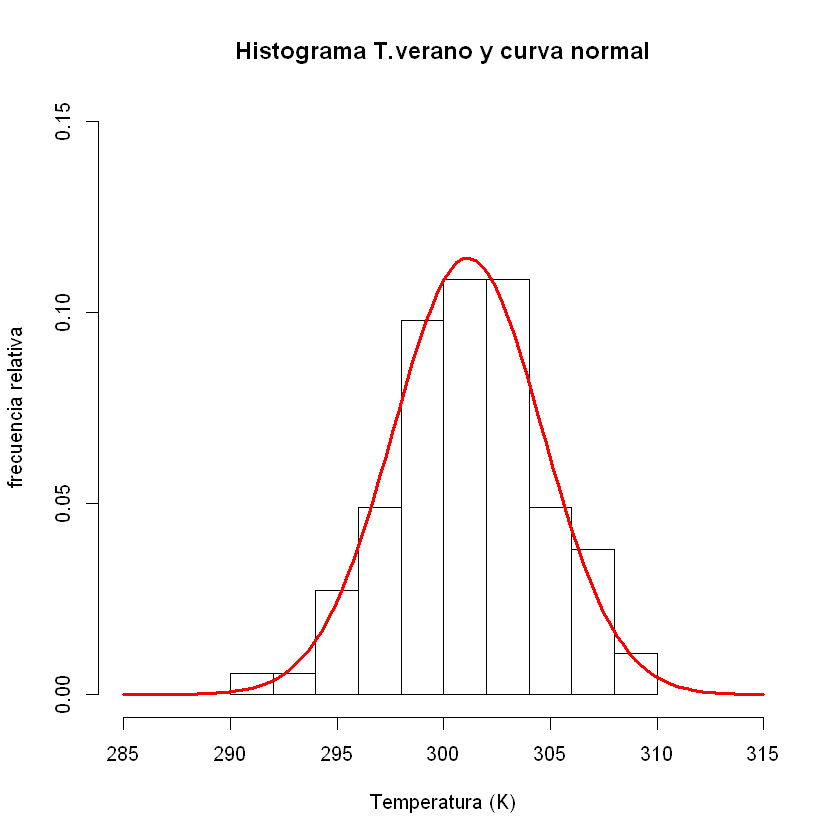

In [16]:
limites <- seq(from=290, to=310, by=2)
histog <- hist(T.verano,breaks=limites,freq=FALSE,ylim=c(0,0.15),main='Histograma T.verano y curva normal',
               xlab='Temperatura (K)',ylab='frecuencia relativa',xlim=c(285,315))
histog
curve(dnorm(x, mean=mean(T.verano), sd=sd(T.verano)), add=TRUE, type="l", col="red", lwd=3)

In [17]:
# calculamos las frecuencias esperadas
# número total de intervalos
ninterv <- length(limites)-1
# inicializamos vector de frecuencias relativas (probabilidades)
p <- numeric(ninterv)
# Rellenamos el vector para cada intervalo
for (i in 1:ninterv) {
    # último intervalo
    if (i == ninterv) {
        p[i] = pnorm(limites[i], mean=mean(T.verano), sd=sd(T.verano), lower.tail=FALSE) # cola derecha
    } else {
        # primer intervalo
        if (i == 1) {
            p[i] = pnorm(limites[i+1], mean=mean(T.verano), sd=sd(T.verano))
            # ni primer ni último intervalo
        } else {
            p[i] = pnorm(limites[i+1], mean=mean(T.verano), sd=sd(T.verano))-pnorm(limites[i], mean=mean(T.verano), sd=sd(T.verano))
        }
    }
}

In [18]:
#Informacion del histograma - tabla
inter <- histog$breaks[2]-histog$breaks[1]  #longitud del intervalo
tfreq <- data.frame(1:length(histog$mids),histog$breaks[1:10],histog$breaks[2:11],histog$mids,histog$counts)
names(tfreq) <- c("intervalo","a_i","a_i+1","c_i","n_i")
#las frecuencias absolutas en cada intervalo según nuestra distribución normal serán e_i=N*p_i=92*p_i
pabs <- length(T.verano)*p
#Agrupamos intervalos para que en cada uno haya al menos 5 elementos.
tfreq <- cbind(tfreq,pabs) #Le añadimos al data frame una columna con las frecuencias anteriores
names(tfreq)[6] <- "e_i"   #El nombre salía erroneamente
tfreq2 <- data.frame(tfreq[c(-1,-2,-3,-9,-10),],row.names=NULL)
tfreq2$intervalo <- c(2,3,4,5,6)
c1 <- c(1,'inf',296,(296+290)/2,sum(tfreq$n_i[1:3]),sum(tfreq$e_i[1:3]))
c7 <- c(7,306,'inf',(310+306)/2,sum(tfreq$n_i[9:10]),sum(tfreq$e_i[9:10]))
tfreq3 <- rbind(c1,tfreq2,c7)
names(tfreq3)[3] <- "a_i+1"
cat('La tabla con las frecuencias por intervalo, una vez aunados los de frecuencias menores a 5 es: \n')
tfreq3

La tabla con las frecuencias por intervalo, una vez aunados los de frecuencias menores a 5 es: 


intervalo,a_i,a_i+1,c_i,n_i,e_i
1,inf,296,293,7,6.53359862113974
2,296,298,297,9,10.5101339064623
3,298,300,299,18,17.3126463027868
4,300,302,301,20,20.7242284856655
5,302,304,303,20,18.0291677821802
6,304,306,305,9,11.3982398921278
7,306,inf,308,9,7.4919850096376


In [19]:
#Necesitamos unir los tres primeros intervalos y los dos últimos:
p5<-c(p[1]+p[2]+p[3],p[4:8],p[9]+p[10])
#Número observado de medidas por intervalo:
o <- histog$counts
onew <- c(o[1]+o[2]+o[3],o[4:8],o[9]+o[10])
#Número esperado de medidas por intervalo:
enew <- p5*length(T.verano)

#El número de intervalos será entonces k=7. Y al haber deducido los parámetros poblacionales a partir de los muestrales, el 
#número final de grados de libertad será k-p-1=7-2=4

In [20]:
#La hipótesis nula consiste en suponer que la distribución de las temperaturas en verano siguen una distribución normal
#El estadístico de prueba será:
chi2 <- sum((onew-enew)^2/enew)
#Con alpha=0.05 y 4 grados de libertad, el valor crítico del estadístico es:
chi2.alpha <- qchisq(0.05,df=4,lower.tail=FALSE)

cat('Como el valor del estadístico es',chi2,'y el valor crítico de aceptación de la hipótesis',chi2.alpha,', para un nivel de 
confianza de 0.05, se acepta la hipótesis de que los datos de temperatura en verano siguen una distribución normal. Entonces 
los contrastes de hipótesis realizados en los apartados del 3 al 5 tendrían sentido.\n')

Como el valor del estadístico es 1.326452 y el valor crítico de aceptación de la hipótesis 9.487729 , para un nivel de 
confianza de 0.05, se acepta la hipótesis de que los datos de temperatura en verano siguen una distribución normal. Entonces 
los contrastes de hipótesis realizados en los apartados del 3 al 5 tendrían sentido.


### 7)
Volver a usar la temperatura considerando todos los meses para los que hay datos. Hacer un
análisis de varianza para determinar si hay relación entre la temperatura media y el mes ¿Qué
valores se obtienen para: A) el cuadrado medio de los tratamientos; B) el cuadrado medio del
azar; C) el nivel de significación para el que se puede rechazar la hipotesis nula de igualdad de
medias?

In [33]:
cat('La hipótesis nula es que los efectos producidos por los tratamientos no son significativamente diferentes. \n')
nt <- nrow(airqualityKelvin)
fmeses <- factor(airqualityKelvin$Month) #factor de los meses
p <- length(levels(fmeses))
C <- (sum(airqualityKelvin$Temp))^2/nt
VT <- sum(airqualityKelvin$Temp^2)-C     #Variación total
T <- tapply(airqualityKelvin$Temp, fmeses, sum)
n <- tapply(airqualityKelvin$Temp, fmeses, length)
VET <- sum(T^2/n)-C                      #Variación entre tratamientos
VDT <- VT - VET                          #Variación dentro de los tratamientos
MT <- VET/(p-1)                          #Cuadrado medio de los tratamientos
ME <- VDT/(nt-p)                         #Cuadrado medio del azar
cat('El cuadrado medio de los tratamientos es',MT,' y el cuadrado medio del azar',ME,', que es menor, por lo que
esperaríamos que la hipótesis no se cumpliera y la variación entre tratamientos no se debiera al azar. En ese caso
existiría una relación entre temperatura media y mes.\n')


#Hallamos el nivel de significación para el que se puede rechazar la hipótesis nula mediante la función aov
mianova <- aov(airqualityKelvin$Temp ~ fmeses)
sumario <- summary(mianova)
sumario
cat('Se aceptaría la hipótesis de igualdad de medias de temperatura entre los meses para un nivel de significación de 2e-16.\n')


cat('Si usaramos un nivel de significación de 0.05, podríamos hacer el \n')
F <- MT/ME                               #Estadístico de Fisher
alpha <- 0.05                            #nivel de significación
Fcrit <- qf(alpha, df1=p-1, df2=nt-p, lower.tail=FALSE)
cat('El valor del estadístico F y su valor crítico son',F,'y',Fcrit,', por lo que se debe rechazar la hipótesis nula
y considerar que sí existe una relación entre la temperatura media y el mes. \n')

La hipótesis nula es que los efectos producidos por los tratamientos no son significativamente diferentes. 
El cuadrado medio de los tratamientos es 544.8401  y el cuadrado medio del azar 13.67358 , que es menor, por lo que
esperaríamos que la hipótesis no se cumpliera y la variación entre tratamientos no se debiera al azar. En ese caso
existiría una relación entre temperatura media y mes.


             Df Sum Sq Mean Sq F value Pr(>F)    
fmeses        4   2179   544.8   39.85 <2e-16 ***
Residuals   148   2024    13.7                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Se aceptaría la hipótesis de igualdad de medias de temperatura entre los meses para un nivel de significación de 2e-16.
Si usaramos un nivel de significación de 0.05, podríamos hacer el 
El valor del estadístico F y su valor crítico son 39.84619 y 2.432788 , por lo que se debe rechazar la hipótesis nula
y considerar que sí existe una relación entre la temperatura media y el mes. 
